In [399]:
#import the necessary  modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [400]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

# Exploratory Data Analysis

In [401]:
#read weather data into pandas dataframe
df = pd.read_csv("mbita_weather.csv", sep=";")

#view first 10 rows
df.head(10)



,PeriodEnd,PeriodStart,Period,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
0,01/01/2059 02:00,01/01/2059 01:00,0.01:00:00,18.9,-156,44.0,17.2,0,0,0,0,37.1,89.9,0,869.6,304,1.1,154,0.11
1,01/01/2059 03:00,01/01/2059 02:00,0.01:00:00,19.1,-135,81.9,17.6,0,0,0,0,37.8,90.7,0,869.2,349,1.0,145,0.11
2,01/01/2059 04:00,01/01/2059 03:00,0.01:00:00,18.9,-124,80.0,17.6,0,0,0,0,38.3,92.1,0,869.0,12,1.1,134,0.11
3,01/01/2059 05:00,01/01/2059 04:00,0.01:00:00,18.1,-118,80.2,17.2,0,0,0,0,38.5,94.2,0,869.0,17,1.0,121,0.11
4,01/01/2059 06:00,01/01/2059 05:00,0.01:00:00,17.4,-114,74.0,16.8,0,0,0,0,38.6,96.4,0,869.0,22,0.8,107,0.11
5,01/01/2059 07:00,01/01/2059 06:00,0.01:00:00,17.3,-113,68.6,16.9,1,0,0,1,38.9,97.5,0,869.3,35,0.8,93,0.11
6,01/01/2059 08:00,01/01/2059 07:00,0.01:00:00,17.8,-114,89.5,17.4,13,0,0,13,39.2,97.5,0,869.8,50,0.9,80,0.11
7,01/01/2059 09:00,01/01/2059 08:00,0.01:00:00,18.3,-115,96.1,17.9,16,0,0,16,39.5,97.4,0,870.3,61,1.1,66,0.11
8,01/01/2059 10:00,01/01/2059 09:00,0.01:00:00,18.8,-119,93.8,18.4,38,0,0,38,39.9,97.1,0,870.3,65,1.1,53,0.11
9,01/01/2059 11:00,01/01/2059 10:00,0.01:00:00,19.3,-127,80.5,18.7,153,5,4,157,40.3,96.5,0,870.0,63,0.8,40,0.11


In [402]:
#view shape of the weather data frame
df.shape

(8760, 19)

In [403]:
#read solar energy data into pandas dataframe
target_df = pd.read_excel("Target_data_Mbita.xlsx")

#view first 10 rows
target_df.head(10)

,PowerEnergy
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,2145.520613
8,3931.054827
9,8293.416190


In [404]:
#view shape of the Solar Energy data frame
target_df.shape

(8761, 1)

In [405]:
#Add the Power Energy column of target_df to the weather dataframe
df["SolarEnergyOutput"] = target_df["PowerEnergy"]
df

,PeriodEnd,PeriodStart,Period,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,SolarEnergyOutput
0,01/01/2059 02:00,01/01/2059 01:00,0.01:00:00,18.9,-156,44.0,17.2,0,0,0,0,37.1,89.9,0,869.6,304,1.1,154,0.11,0.0
1,01/01/2059 03:00,01/01/2059 02:00,0.01:00:00,19.1,-135,81.9,17.6,0,0,0,0,37.8,90.7,0,869.2,349,1.0,145,0.11,0.0
2,01/01/2059 04:00,01/01/2059 03:00,0.01:00:00,18.9,-124,80.0,17.6,0,0,0,0,38.3,92.1,0,869.0,12,1.1,134,0.11,0.0
3,01/01/2059 05:00,01/01/2059 04:00,0.01:00:00,18.1,-118,80.2,17.2,0,0,0,0,38.5,94.2,0,869.0,17,1.0,121,0.11,0.0
4,01/01/2059 06:00,01/01/2059 05:00,0.01:00:00,17.4,-114,74.0,16.8,0,0,0,0,38.6,96.4,0,869.0,22,0.8,107,0.11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31/12/2059 21:00,31/12/2059 20:00,0.01:00:00,20.2,116,0.0,18.2,0,0,0,0,25.8,88.1,0,868.2,219,2.5,114,0.10,0.0
8756,31/12/2059 22:00,31/12/2059 21:00,0.01:00:00,19.5,120,0.0,18.0,0,0,0,0,25.7,91.4,0,868.5,206,2.4,127,0.10,0.0
8757,31/12/2059 23:00,31/12/2059 22:00,0.01:00:00,19.0,128,0.0,17.7,0,0,0,0,25.8,92.2,0,868.6,190,2.2,140,0.10,0.0
8758,01/01/2060 00:00,31/12/2059 23:00,0.01:00:00,18.5,144,0.0,17.4,0,0,0,0,25.9,92.9,0,868.7,173,2.1,150,0.10,0.0


In [406]:
#view column names
df.columns

Index(['PeriodEnd', 'PeriodStart', 'Period', 'AirTemp', 'Azimuth',
       'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi',
       'PrecipitableWater', 'RelativeHumidity', 'SnowWater', 'SurfacePressure',
       'WindDirection10m', 'WindSpeed10m', 'Zenith', 'AlbedoDaily',
       'SolarEnergyOutput'],
      dtype='object')

In [408]:
#check for missind data
df.isna().sum()

PeriodEnd            0
PeriodStart          0
Period               0
AirTemp              0
Azimuth              0
CloudOpacity         0
DewpointTemp         0
Dhi                  0
Dni                  0
Ebh                  0
Ghi                  0
PrecipitableWater    0
RelativeHumidity     0
SnowWater            0
SurfacePressure      0
WindDirection10m     0
WindSpeed10m         0
Zenith               0
AlbedoDaily          0
SolarEnergyOutput    0
dtype: int64

***Observation: There is no missing data in the dataset

In [409]:
#view information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PeriodEnd          8760 non-null   object 
 1   PeriodStart        8760 non-null   object 
 2   Period             8760 non-null   object 
 3   AirTemp            8760 non-null   float64
 4   Azimuth            8760 non-null   int64  
 5   CloudOpacity       8760 non-null   float64
 6   DewpointTemp       8760 non-null   float64
 7   Dhi                8760 non-null   int64  
 8   Dni                8760 non-null   int64  
 9   Ebh                8760 non-null   int64  
 10  Ghi                8760 non-null   int64  
 11  PrecipitableWater  8760 non-null   float64
 12  RelativeHumidity   8760 non-null   float64
 13  SnowWater          8760 non-null   int64  
 14  SurfacePressure    8760 non-null   float64
 15  WindDirection10m   8760 non-null   int64  
 16  WindSpeed10m       8760 

From the above information, it can be seen that all the columns except "PeriodEnd", "PeriodStart" and "Period" representing dates are numerical data in float or integer data type.

Hence we drop the irrevant date columns and change the correct date column from object data type to Pandas Datetime format.

In [410]:
#convert date column from object data type to pandas date time format
df['Date'] = pd.to_datetime(df['PeriodStart'])

#df.set_index('Date', inplace=True)



In [411]:
#drop the irrelevant columns
df.drop(['PeriodEnd', 'Period','PeriodStart'], axis=1,inplace = True)

df.head(3)

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,SolarEnergyOutput,Date
0,18.9,-156,44.0,17.2,0,0,0,0,37.1,89.9,0,869.6,304,1.1,154,0.11,0.0,2059-01-01 01:00:00
1,19.1,-135,81.9,17.6,0,0,0,0,37.8,90.7,0,869.2,349,1.0,145,0.11,0.0,2059-01-01 02:00:00
2,18.9,-124,80.0,17.6,0,0,0,0,38.3,92.1,0,869.0,12,1.1,134,0.11,0.0,2059-01-01 03:00:00


In [412]:
#check information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   AirTemp            8760 non-null   float64       
 1   Azimuth            8760 non-null   int64         
 2   CloudOpacity       8760 non-null   float64       
 3   DewpointTemp       8760 non-null   float64       
 4   Dhi                8760 non-null   int64         
 5   Dni                8760 non-null   int64         
 6   Ebh                8760 non-null   int64         
 7   Ghi                8760 non-null   int64         
 8   PrecipitableWater  8760 non-null   float64       
 9   RelativeHumidity   8760 non-null   float64       
 10  SnowWater          8760 non-null   int64         
 11  SurfacePressure    8760 non-null   float64       
 12  WindDirection10m   8760 non-null   int64         
 13  WindSpeed10m       8760 non-null   float64       
 14  Zenith  

In [414]:
#view statistical data of the Dataframe
df.describe()

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,SolarEnergyOutput
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.00000,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,20.683436,0.102055,16.941495,16.845628,77.838813,241.211758,182.174886,260.01210,31.437648,80.202386,0.0,869.622717,175.410388,1.779509,90.000457,0.103753,5045.353221
std,2.775981,95.985044,25.510734,1.482116,111.302525,349.469058,290.124853,351.72331,4.650490,13.747371,0.0,1.619459,88.935605,0.815983,47.371844,0.005117,6938.176497
min,14.200000,-180.000000,0.000000,8.200000,0.000000,0.000000,0.000000,0.00000,15.500000,23.400000,0.0,864.000000,1.000000,0.000000,4.000000,0.090000,0.000000
25%,18.500000,-88.000000,0.000000,16.100000,0.000000,0.000000,0.000000,0.00000,28.600000,72.600000,0.0,868.600000,100.000000,1.200000,47.000000,0.100000,0.000000
50%,20.100000,6.000000,0.700000,17.000000,10.000000,1.000000,0.000000,11.00000,32.000000,84.800000,0.0,869.700000,179.000000,1.700000,90.000000,0.100000,0.000000
75%,22.500000,88.250000,27.525000,17.800000,121.000000,548.000000,327.250000,547.00000,34.700000,90.900000,0.0,870.800000,248.000000,2.200000,133.000000,0.110000,10077.312031
max,31.900000,180.000000,98.500000,21.400000,612.000000,1018.000000,963.000000,1086.00000,46.800000,98.900000,0.0,874.100000,359.000000,5.400000,176.000000,0.120000,22289.589657


In [333]:
#Add new columns to the Dataframe
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['MonthName'] = pd.DatetimeIndex(df['Date']).month_name()
df['DayOfYear'] = pd.DatetimeIndex(df['Date']).dayofyear
df['DayName'] = pd.DatetimeIndex(df['Date']).day_name()

df.head(5)

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,...,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,SolarEnergyOutput,Date,Month,MonthName,DayOfYear,DayName
0,18.9,-156,44.0,17.2,0,0,0,0,37.1,89.9,...,304,1.1,154,0.11,0.0,2059-01-01 01:00:00,1,January,1,Wednesday
1,19.1,-135,81.9,17.6,0,0,0,0,37.8,90.7,...,349,1.0,145,0.11,0.0,2059-01-01 02:00:00,1,January,1,Wednesday
2,18.9,-124,80.0,17.6,0,0,0,0,38.3,92.1,...,12,1.1,134,0.11,0.0,2059-01-01 03:00:00,1,January,1,Wednesday
3,18.1,-118,80.2,17.2,0,0,0,0,38.5,94.2,...,17,1.0,121,0.11,0.0,2059-01-01 04:00:00,1,January,1,Wednesday
4,17.4,-114,74.0,16.8,0,0,0,0,38.6,96.4,...,22,0.8,107,0.11,0.0,2059-01-01 05:00:00,1,January,1,Wednesday


In [334]:
#Dataframe showing statistical data
df_aggregate = df.groupby("Month")[["AirTemp", "RelativeHumidity", "WindSpeed10m", "Ghi", "Dhi", "Dni", "SolarEnergyOutput"]].mean().reset_index()
df_aggregate

,Month,AirTemp,RelativeHumidity,WindSpeed10m,Ghi,Dhi,Dni,SolarEnergyOutput
0,1,20.994892,78.614516,1.751882,271.345430,72.782258,273.668011,4631.634299
1,2,21.580804,75.118304,2.087054,264.681548,82.474702,238.741071,5198.583194
2,3,21.437231,79.834677,1.975134,277.125000,84.236559,251.071237,5342.197555
3,4,20.360556,84.785972,1.650694,271.152778,71.966667,259.831944,5472.425982
4,5,20.540726,82.515995,1.585349,260.907258,67.399194,258.790323,5314.860297
5,6,20.565278,79.951111,1.656944,241.959722,87.365278,207.423611,5025.891909
6,7,20.551478,75.869355,1.744892,240.952957,81.254032,212.138441,5038.667647
7,8,20.077554,80.664785,1.785081,274.329301,73.885753,264.096774,5164.268710
8,9,20.609861,80.721111,1.685833,260.018056,85.875000,224.631944,5279.189875
9,10,20.560887,80.381989,1.727151,254.192204,78.637097,226.939516,4992.419706


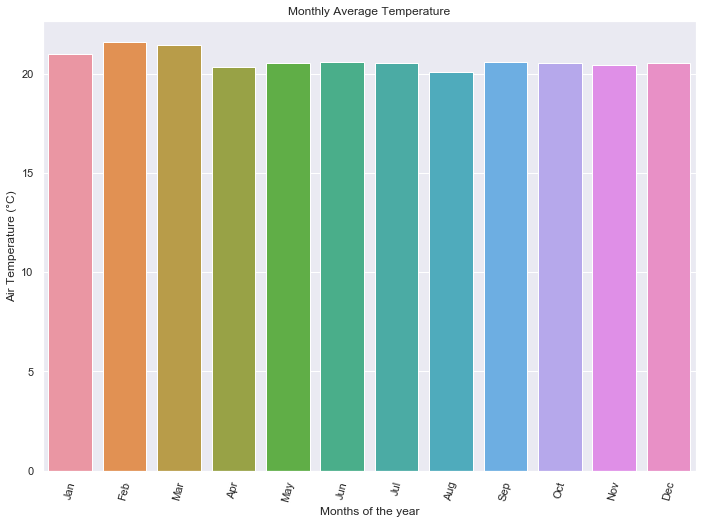

In [335]:
#sns.set_theme(style="whitegrid")
sns.color_palette("tab10")
sns.set(style="ticks")
#tips = sns.load_dataset("tips")
#ax = sns.barplot(x="day", y="total_bill", data=tips)
sns.set(rc={'figure.figsize':(11.7,8.27)})
#Months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
ax = sns.barplot(x = "Month", y="AirTemp", data = df_aggregate)#, order=Months)

plt.title("Monthly Average Temperature")
ax.set(xticklabels= ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]);
plt.xticks(rotation = 75)
plt.xlabel("Months of the year")
plt.ylabel("Air Temperature (°C)")
#ax.set(x_label ='Months of the year', y_label = 'Air Temperature (°C)')
plt.show()

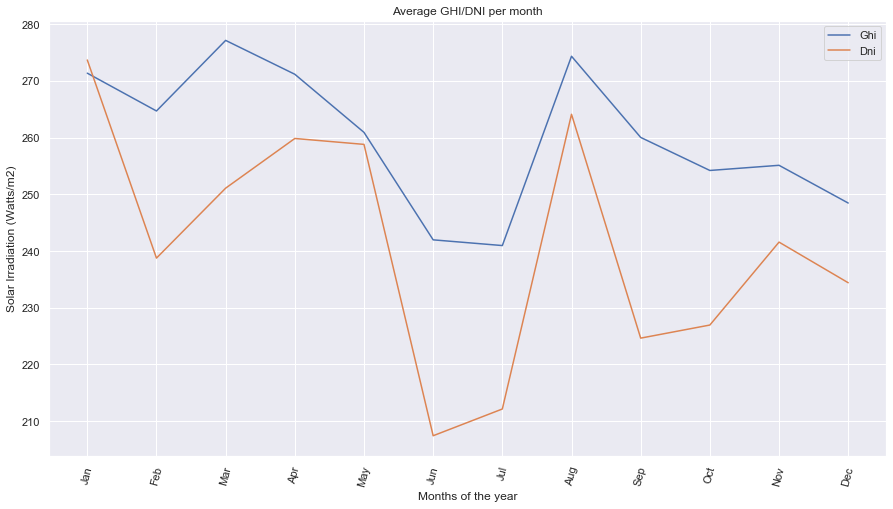

In [419]:
plt.figure(figsize=(15, 8))
x = df_aggregate["Month"]
y = df_aggregate[['Ghi', 'Dni']]
positions = [1,2,3,4,5,6,7,8,9,10,11,12]
labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(positions, labels)
plt.plot(x, y)
plt.xticks(rotation = 75)
plt.xlabel("Months of the year")
plt.ylabel("Solar Irradiation (Watts/m2)")
plt.title('Average GHI/DNI per month');
plt.legend(y)
#plt.savefig("out.png")

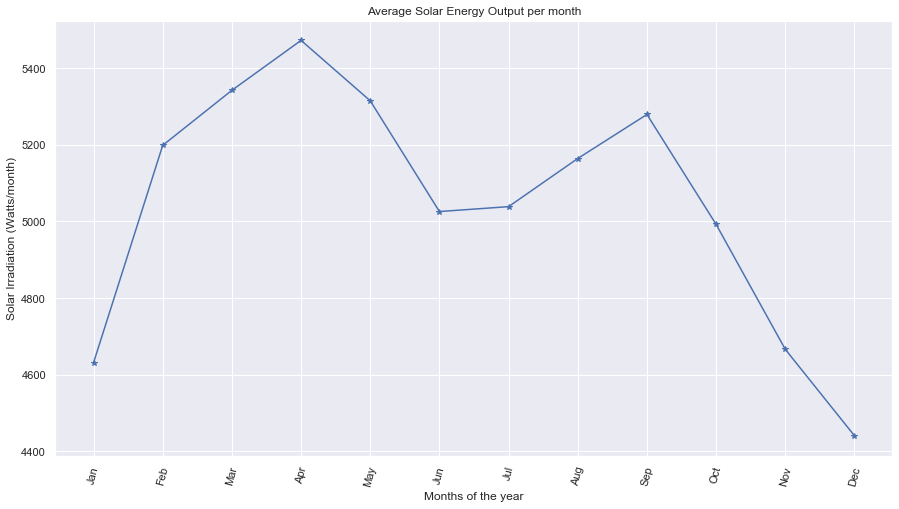

In [339]:
plt.figure(figsize=(15, 8))
x = df_aggregate["Month"]
y = df_aggregate["SolarEnergyOutput"]
positions = [1,2,3,4,5,6,7,8,9,10,11,12]
labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(positions, labels)
plt.plot(x, y, marker='*')
plt.xticks(rotation = 75)
plt.xlabel("Months of the year")
plt.ylabel("Solar Irradiation (Watts/month)")
plt.title('Average Solar Energy Output per month');
#plt.legend(y)
#plt.savefig("out.png")

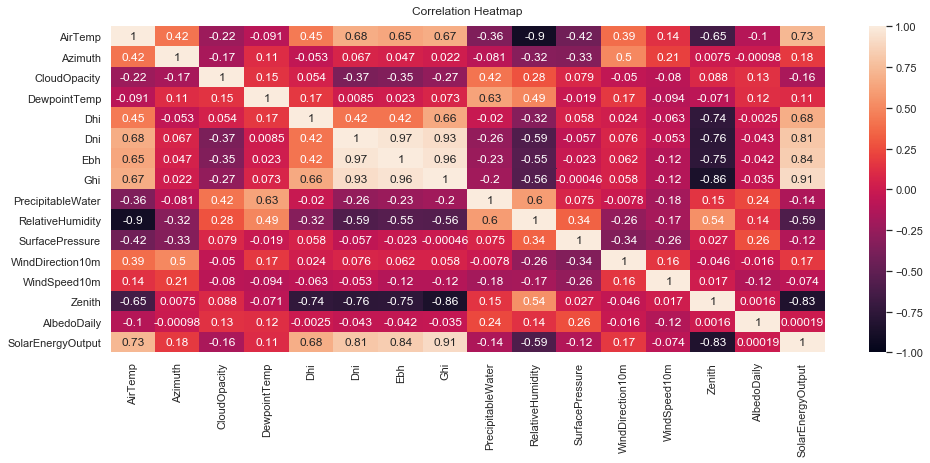

In [367]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.drop(['Month', 'DayOfYear', 'SnowWater'], axis=1).corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Machine Leaning Regression  Model for Solar Energy Prediction

In [344]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [345]:
#select the highly correlated features
x = df[["AirTemp", "Dhi", "Dni", "RelativeHumidity","Zenith"]]

y = df["SolarEnergyOutput"]

In [346]:
#split data into train and test set
x_train_regr, x_test_regr, y_train_regr, y_test_regr = train_test_split(x,y,test_size = 0.3, random_state = 42)


In [347]:
#Create a regression model
regr = linear_model.LinearRegression()

#Train the model using the training data
regr.fit(x_train_regr, y_train_regr)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [348]:
#make prediction using test set
y_pred_regr = regr.predict(x_test_regr)

In [349]:
#check the coefficients

print("Coefficients: \n", regr.coef_)

Coefficients: 
 [866.15824552  17.95739558   8.1811331   73.95803116 -24.65074718]


In [350]:
#Check the mean_squared_error
MSE = mean_squared_error(y_test_regr, y_pred)
MSE

8097466.163635556

In [351]:
#check the r2 score
R2 = r2_score(y_test_regr, y_pred_regr)
R2

0.8247903644265422

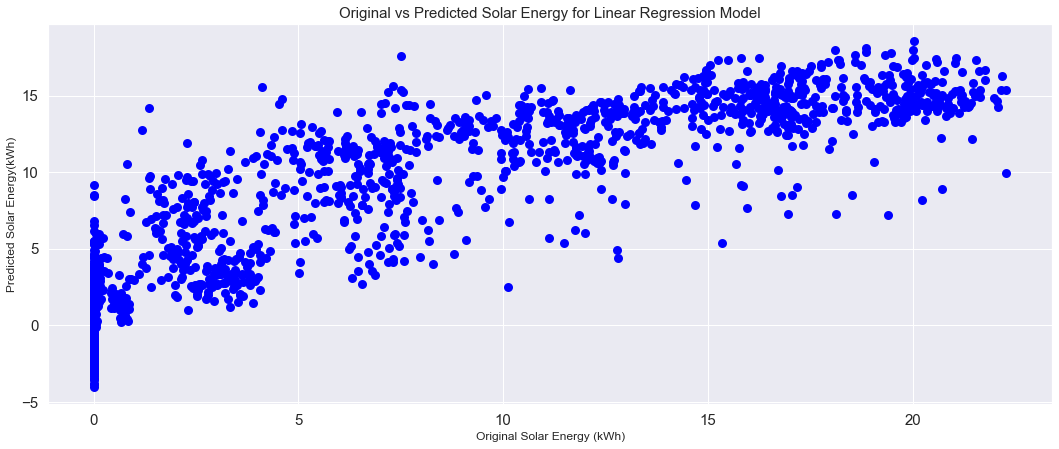

In [421]:
plt.figure(figsize = (18, 7))
plt.scatter(y_test_regr/1000, y_pred_regr/1000, label = "Actual", linewidth = 3, color = "blue")
#plt.scatter(pred_a1.flatten(), label = "Predicted", linewidth = 3, color = "blue" )
plt.title("Original vs Predicted Solar Energy for Linear Regression Model", size = 15)
plt.xlabel("Original Solar Energy (kWh)")
plt.ylabel("Predicted Solar Energy(kWh)")
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()

# Machine Leaning ANN  Model for Solar Energy Prediction

In [353]:
#select the highly correlated features
x = df[["AirTemp", "Dhi", "Dni", "RelativeHumidity","Zenith"]]

y = df["SolarEnergyOutput"]

In [354]:
#split data into train and test set
x_train_ann, x_test_ann, y_train_ann, y_test_ann = train_test_split(x,y,test_size = 0.3, random_state = 42)


In [355]:
#scale data 
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train_ann)
x_test_std = scaler.transform(x_test_ann)
#y_train_std = scaler.fit_transform(y_train)
#y#_test_std = scaler.transform(y_test)



In [356]:
#initialize new ANN
model = Sequential()

In [357]:
#Adding input layer and first hidden layer
model.add(Dense(32, activation = "relu", input_dim = 5))

#Adding the second hidden layer
model.add(Dense( units = 30, activation = "relu"))

#Adding the third hidden layer
model.add(Dense(units = 20, activation = "relu"))

#Adding output layer
model.add(Dense(units = 1))

model.compile(optimizer = "adam", loss = "mean_squared_error", metrics=['accuracy'])

model.fit(x_train_std, y_train_ann, batch_size = 10, epochs = 100)



#pred_ann = model.predict(x_test_std)

#pd.DataFrame({"Actual":y_test, "Predicted": pred_a1.flatten()})

Epoch 1/100
6132/6132 [==============================] - 3s 469us/step - loss: 41718617.0872 - accuracy: 0.0121
Epoch 2/100
6132/6132 [==============================] - 2s 352us/step - loss: 6809978.6859 - accuracy: 0.2161
Epoch 3/100
6132/6132 [==============================] - 2s 366us/step - loss: 6137888.4459 - accuracy: 0.2842
Epoch 4/100
6132/6132 [==============================] - 2s 358us/step - loss: 5809859.5310 - accuracy: 0.2291
Epoch 5/100
6132/6132 [==============================] - 2s 376us/step - loss: 5506201.1189 - accuracy: 0.0727
Epoch 6/100
6132/6132 [==============================] - 2s 379us/step - loss: 5236282.2705 - accuracy: 0.2459
Epoch 7/100
6132/6132 [==============================] - 2s 357us/step - loss: 4953453.1797 - accuracy: 0.1474
Epoch 8/100
6132/6132 [==============================] - 2s 355us/step - loss: 4727884.8872 - accuracy: 0.0338
Epoch 9/100
6132/6132 [==============================] - 2s 352us/step - loss: 4515378.8576 - accuracy: 0.0272


In [358]:
#Test model with test data
pred_ann = model.predict(x_test_std)

#Data frame of original and predicted solar energy
pd.DataFrame({"Actual":y_test_ann, "Predicted": pred_ann.flatten()})

,Actual,Predicted
6056,7041.373566,6550.597656
5556,18659.274390,17194.947266
5990,16771.501753,13246.143555
7674,0.000000,-144.365784
3319,2421.192773,2597.931396
...,...,...
3404,0.000000,-52.523766
1912,7239.940357,7706.984863
3692,0.000000,-13.999657
599,0.000000,31.339287


In [359]:
#check Mean Squared Error
MSE = mean_squared_error(y_test_ann, pred_ann)
MSE


3355851.4488069247

In [360]:
#check the r2 score
R2 = r2_score(y_test_ann, pred_ann)
R2

0.9273874694253573

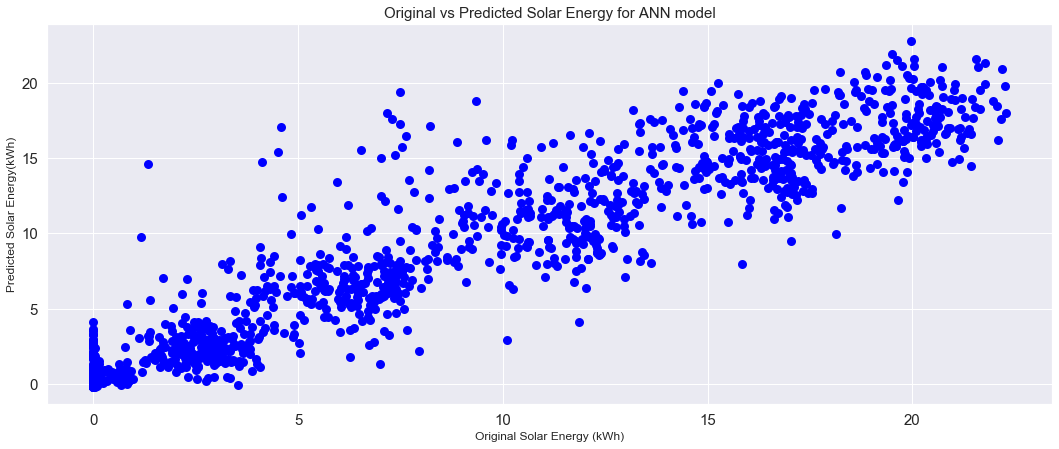

In [420]:
plt.figure(figsize = (18, 7))
plt.scatter(y_test_ann/1000, pred_a1/1000, label = "Actual", linewidth = 3, color = "blue")
#plt.scatter(pred_a1.flatten(), label = "Predicted", linewidth = 3, color = "blue" )
plt.title("Original vs Predicted Solar Energy for ANN model", size = 15)
plt.xlabel("Original Solar Energy (kWh)")
plt.ylabel("Predicted Solar Energy(kWh)")
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()